In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
data = pd.read_csv('/content/movie_review.csv')

In [4]:
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [5]:
data['label'].value_counts()

,count
label,
0,20019
1,19981


In [6]:
data.duplicated().value_counts()

,count
False,39723
True,277


In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.notna().value_counts()

,,count
text,label,
True,True,39723


In [10]:
pos_rev= data[data['label']==1]
neg_rev= data[data['label']==0]

In [11]:
data['length']= data['text'].apply(len)
data.head()
pos_rev= data[data['label']==1]
neg_rev= data[data['label']==0]

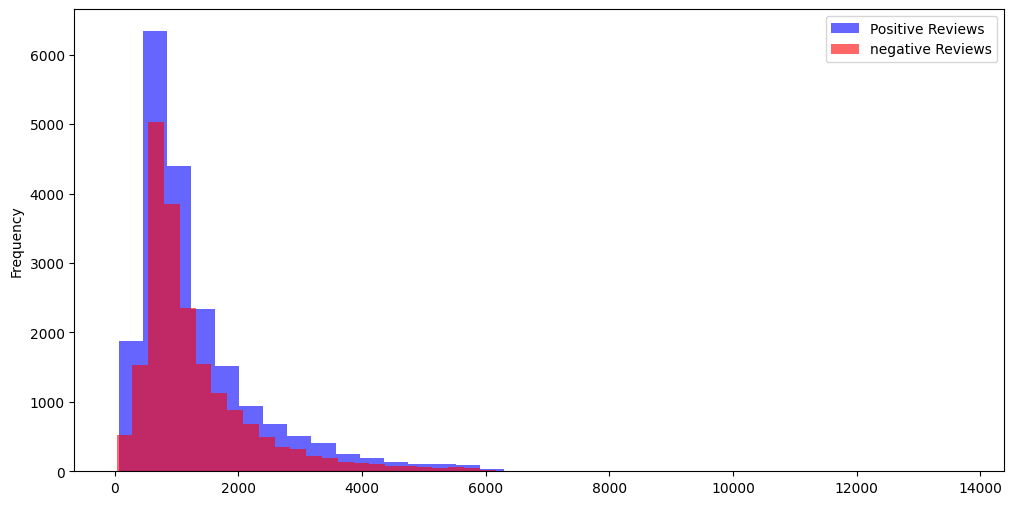

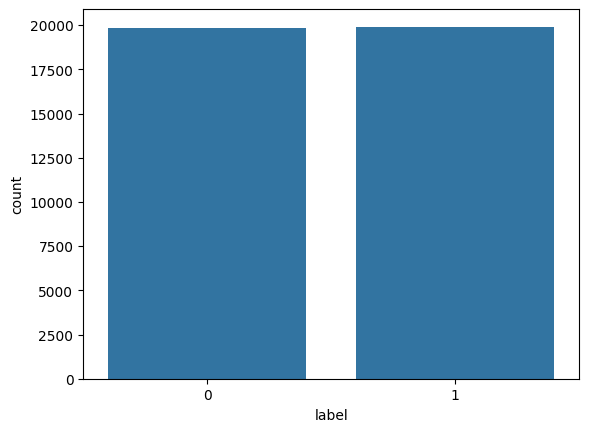

In [12]:
plt.figure(figsize=(12,6))
pos_rev['length'].plot(bins=35,kind='hist',color='blue',label='Positive Reviews',alpha=0.6)
neg_rev['length'].plot(bins=35,kind='hist',color='red',label='negative Reviews',alpha=0.6)
plt.legend()
plt.xlabel="Review Length"
plt.show()
sns.countplot(x='label',data=data);

# Data Pre-Processing

In [13]:
import string
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

data['text']= data['text'].apply(lambda x: x.lower())

Stopwords = stopwords.words('english')
def clean_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in Stopwords])

data['text'] = data['text'].apply(lambda text: clean_stopwords(text))

def sp_char_remove(text):
  return re.sub(r'[^a-zA-Z0-9\s]', ' ',text)

data['text'] = data['text'].apply(lambda text: sp_char_remove(text))
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,label,length
0,grew b 1965 watching loving thunderbirds m...,0,874
1,put movie dvd player sat coke chips expectat...,0,1811
2,people know particular time past like feel nee...,0,983
3,even though great interest biblical movies bo...,0,351
4,im die hard dads army fan nothing ever change ...,1,983


In [15]:
# Stemming
st= nltk.PorterStemmer()
def stemming(data):
  text = [st.stem(word) for word in data]
  return data
data['text']= data['text'].apply(lambda x: stemming(x))
data['text'].head()

,text
0,grew b 1965 watching loving thunderbirds m...
1,put movie dvd player sat coke chips expectat...
2,people know particular time past like feel nee...
3,even though great interest biblical movies bo...
4,im die hard dads army fan nothing ever change ...


In [16]:
#Lemmatization
nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()
def lemmatizing(data):
  text= [lm.lemmatize(word) for word in data]
  return data
data['text']= data['text'].apply(lambda x: lemmatizing(x))
data['text'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,text
0,grew b 1965 watching loving thunderbirds m...
1,put movie dvd player sat coke chips expectat...
2,people know particular time past like feel nee...
3,even though great interest biblical movies bo...
4,im die hard dads army fan nothing ever change ...


In [27]:
X = data['text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
# Bag of Words
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5934
           1       0.88      0.90      0.89      5983

    accuracy                           0.89     11917
   macro avg       0.89      0.89      0.89     11917
weighted avg       0.89      0.89      0.89     11917



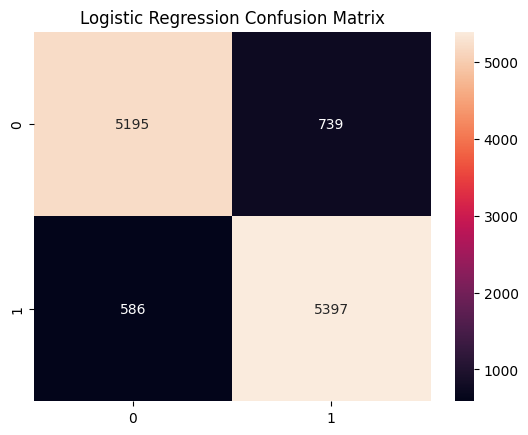


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      5934
           1       0.87      0.82      0.85      5983

    accuracy                           0.85     11917
   macro avg       0.85      0.85      0.85     11917
weighted avg       0.85      0.85      0.85     11917



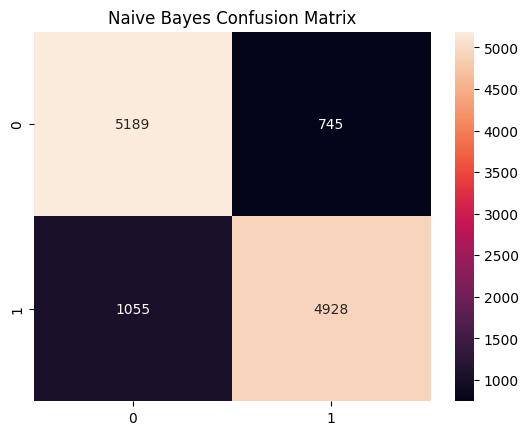


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5934
           1       0.88      0.90      0.89      5983

    accuracy                           0.89     11917
   macro avg       0.89      0.89      0.89     11917
weighted avg       0.89      0.89      0.89     11917



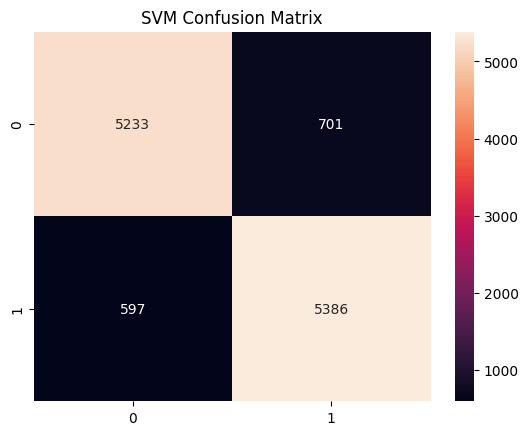


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      5934
           1       0.86      0.85      0.85      5983

    accuracy                           0.85     11917
   macro avg       0.85      0.85      0.85     11917
weighted avg       0.85      0.85      0.85     11917



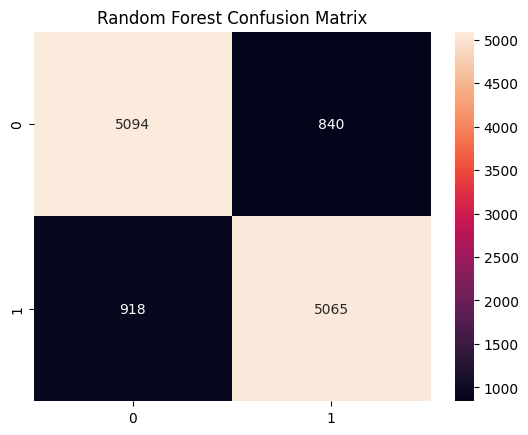

In [29]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": BernoulliNB(),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_test_tfidf)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, preds))
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d')
    plt.title(f'{name} Confusion Matrix')
    plt.show()